<a href="https://colab.research.google.com/github/RishikaVerma21/Measure-Size-of-object/blob/main/Measure_Size_of_object.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing a library that is not in Colaboratory

In [1]:
import cv2

In [2]:
import argparse

In [3]:
import imutils

In [4]:
from scipy.spatial import distance as dist

In [5]:
from imutils import perspective

In [6]:
from imutils import contours

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
%cd /content/drive

/content/drive


In [9]:
import numpy as np

In [10]:
pip install tensorflow-object-detection-api

     |████████████████████████████████| 577 kB 4.4 MB/s 
     |████████████████████████████████| 462 kB 50.4 MB/s 
     |████████████████████████████████| 54 kB 2.3 MB/s 
     |████████████████████████████████| 54 kB 2.4 MB/s 
     |████████████████████████████████| 3.6 MB 51.3 MB/s 
  Created wheel for tensorflow-object-detection-api: filename=tensorflow_object_detection_api-0.1.1-py3-none-any.whl size=844512 sha256=165913720c99f30cab061fb38bfaf25703eea399c670ba427347ebd9f17ac2a3
  Stored in directory: /root/.cache/pip/wheels/71/7e/a2/461ab817fbaef68ec9cc60df16d3669d1285f032e4c98179bf
Successfully built tensorflow-object-detection-api


**Imported object detector module so we select all from object detector module**

In [11]:
!pip install object_detector

     |████████████████████████████████| 3.1 MB 4.0 MB/s 
     |████████████████████████████████| 60.3 MB 51 kB/s 
     |████████████████████████████████| 15.7 MB 9.7 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
  Attempting uninstall: Pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have img

In [12]:
from object_detector import *

In [41]:
img = cv2.imread("/content/drive/MyDrive/Open CV/resized_1500x1500.jpg")

In [43]:
print(img.shape)

(1500, 1500, 3)


In [44]:
from google.colab.patches import cv2_imshow

In [45]:
#!pip install pillow==4.1.1
%reload_ext autoreload
%autoreload

In [46]:
# workaround 
from PIL import Image
def register_extension(id, extension): Image.EXTENSION[extension.lower()] = id.upper()
Image.register_extension = register_extension
def register_extensions(id, extensions): 
  for extension in extensions: register_extension(id, extension)
Image.register_extensions = register_extensions

In [18]:
!pip install -U pillow

     |████████████████████████████████| 4.3 MB 3.8 MB/s 
  Attempting uninstall: pillow
    Found existing installation: Pillow 8.4.0
    Uninstalling Pillow-8.4.0:
      Successfully uninstalled Pillow-8.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
object-detector 1.4 requires Pillow==8.4.0, but you have pillow 9.0.1 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [47]:
import PIL
print(PIL.PILLOW_VERSION)

7.1.2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: PILLOW_VERSION is deprecated and will be removed in a future release. Use __version__ instead.
  


In [48]:
from PIL import Image

def register_extension(id, extension): Image.EXTENSION[extension.lower()] = id.upper()
Image.register_extension = register_extension
def register_extensions(id, extensions): 
  for extension in extensions: register_extension(id, extension)
Image.register_extensions = register_extensions

In [55]:
#cv2_imshow(img)

In [22]:
cv2.waitKey(0)

-1

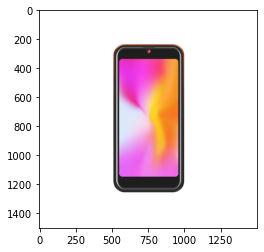

In [49]:
from matplotlib import pyplot as plt


#Show the image with matplotlib
plt.imshow(img)
plt.show()

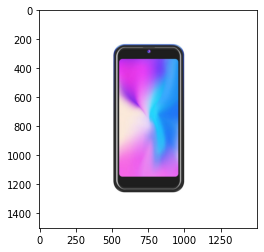

In [50]:
# load image using cv2....and do processing.
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
# as opencv loads in BGR format by default, we want to show it in RGB.
plt.show()

In [51]:
from google.colab.patches import cv2_imshow

In [52]:
import PIL
print(PIL.PILLOW_VERSION)

7.1.2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: PILLOW_VERSION is deprecated and will be removed in a future release. Use __version__ instead.
  


In [33]:
from PIL import Image

def register_extension(id, extension): Image.EXTENSION[extension.lower()] = id.upper()
Image.register_extension = register_extension
def register_extensions(id, extensions): 
  for extension in extensions: register_extension(id, extension)
Image.register_extensions = register_extensions

In [35]:
def load_img_id(ds, idx): return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

In [37]:
def load_img_id(ds, idx): return np.array(Image.open(PATH+ds.fnames[idx]))

In [54]:
#cv2_imshow(img)

In [28]:
cv2.destroyAllWindows()

In [29]:
import cv2


class HomogeneousBgDetector():
    def __init__(self):
        pass

    def detect_objects(self, frame):
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        mask = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 19, 5)

        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        objects_contours = []

        for cnt in contours:
            area = cv2.contourArea(cnt)
            if area > 2000:
                objects_contours.append(cnt)

        return objects_contours

In [30]:
#Load Object Detector
detector = HomogeneousBgDetector()
...
contours = detector.detect_objects(img)
...

Ellipsis

In [53]:
#cv2_imshow(img)